# 7.3 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

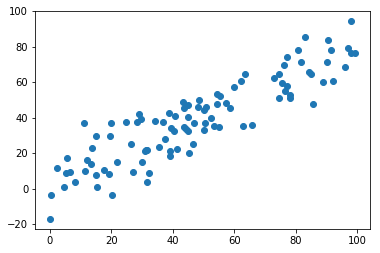

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### 7.3.1 demean 均值归零化

In [4]:
# X按行的方向求均值（即每一列的均值），得到的是一个列向量
# 处理完之后，每一列的均值都为0左右
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

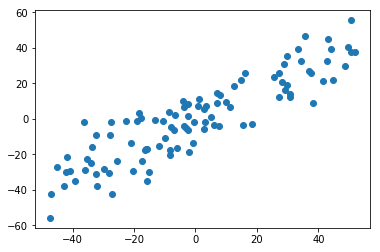

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [7]:
np.mean(X_demean[:,0])

-1.1048939541069557e-14

In [8]:
np.mean(X_demean[:,1])

-5.258016244624741e-15

### 7.3.2 梯度上升法
    - 每一次求到了w向量后转化为单位向量
        - 如果不转换，w每一次就会很大，搜索起来很不顺畅
        - w如果很大，则学习率就要很小，而循环次数需要更多，更耗时
    - 搜索不能从零向量开始
        - 零向量代入时结果还是零向量
        - 而梯度上升法需要不是最小值，而是需要最大值的位置
    - 不能使用StandardScaler标准化数据
        - PCA的过程就找到一个轴，使得所有样本映射到轴上以后，样本的方差最大
        - 而StandardScaler标准化使得方差变为1了，求不出PCA真正想最大化的结果了
        - demean的过程已经把均值变为0了，但方差没有发生变化，即demean已经进行了PCA所需的标准化

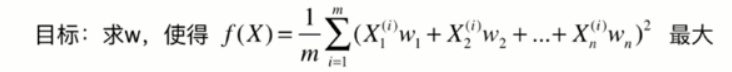

In [9]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [10]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [11]:
# w_+ 和 w_- 
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [12]:
#

In [13]:
# 把向量转换为单位向量，即向量除以向量的模
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    #初始的w转换为单位向量    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = 2
        w = w + eta * gradient
        # 注意1: 每一次求到了w向量后转化为单位向量
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1
        
    return w

In [14]:
initial_w = np.random.random(X.shape[1]) # 注意2: 不能用零向量开始，这里以特征数作为个数，随机生成一个
initial_w

array([0.46149748, 0.88801892])

In [15]:
eta = 0.001

In [16]:
# 注意3：不能使用StandardScaler标准化数据，使用demean即可

In [17]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.76582079, 0.64305405])

In [18]:
# 使用df_debug的df_math的结果一致，说明math的公式推导是正确的
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.76582079, 0.64305405])

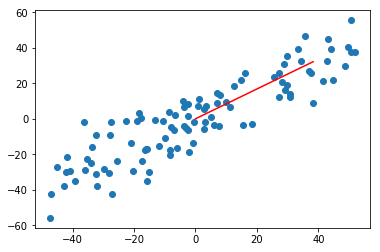

In [19]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:,0], X_demean[:,1])
# 画一个(0,0)，(w[0],w[1])两点构成的即为方向，乘以一个50可更明显地显示出来
plt.plot([0, w[0]*50],[0, w[1]*50], color='r')
plt.show()

### 7.3.3 使用极端数据进行测试
    - 取斜率为0.75，即y/x = 3/4
    - 因此可以预估，w[1]/w[0] = 3/4，而且与零点形成的向量与样本分布的直线重合

In [20]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

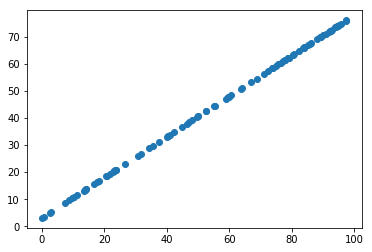

In [21]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [22]:
X2_demean = demean(X2)

In [23]:
# 和预估的是一样的，tan值为3/4
gradient_ascent(df_math, X2_demean, initial_w, eta)

array([0.8, 0.6])

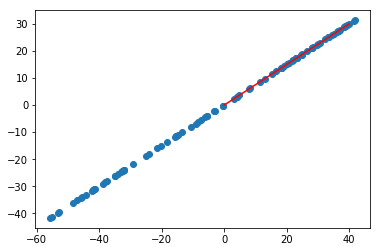

In [24]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

plt.scatter(X2_demean[:,0], X2_demean[:,1])
# 画一个(0,0)，(w[0],w[1])两点构成的即为方向，乘以一个50可更明显地显示出来
plt.plot([0, w2[0]*50],[0, w2[1]*50], color='r')
plt.show()